<a href="https://colab.research.google.com/github/UlisesNuB/Examen1/blob/main/last_mile_delibery_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos librerias pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [3]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv("lastmile_delivery_operations_mit_lift_lab_serving_customer.csv")

In [ ]:
#Verificamos informacion de DataFrame
data.info()

In [5]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

_child_record_id                           0
_record_id                                 0
_parent_id                                 0
_title                                     0
_version                                   0
_created_at                                0
_updated_at                                0
_created_by                                0
_updated_by                                0
_index                                     0
_geometry                                  0
_latitude                                  0
_longitude                                 0
_changeset_id                              0
_created_duration                          0
_updated_duration                          0
_edited_duration                           0
name_of_the_store                          0
entering_the_store                         0
number_of_customers_in_store               0
number_of_suppliers_in_store               0
picture_cargo_being_delivered             10
picture_ca

In [6]:
#Rellenamos estas columas de imagenes con no hay imagen, ya que no se puede inventar
data["picture_cargo_being_delivered"]=data["picture_cargo_being_delivered"].fillna("No hay imagen")
data["picture_cargo_being_delivered_captions"]=data["picture_cargo_being_delivered_captions"].fillna("No hay imagen")
data["picture_cargo_being_delivered_urls"]=data["picture_cargo_being_delivered_urls"].fillna("No hay imagen")

In [7]:
#Corroboramos valores nulos en cada fila
valores_nulos=data.isnull().sum()
valores_nulos

_child_record_id                          0
_record_id                                0
_parent_id                                0
_title                                    0
_version                                  0
_created_at                               0
_updated_at                               0
_created_by                               0
_updated_by                               0
_index                                    0
_geometry                                 0
_latitude                                 0
_longitude                                0
_changeset_id                             0
_created_duration                         0
_updated_duration                         0
_edited_duration                          0
name_of_the_store                         0
entering_the_store                        0
number_of_customers_in_store              0
number_of_suppliers_in_store              0
picture_cargo_being_delivered             0
picture_cargo_being_delivered_ca

<Figure size 1080x576 with 0 Axes>

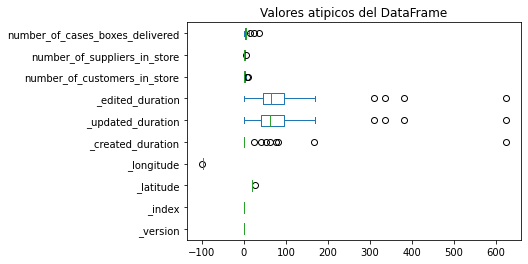

In [8]:
#Realizamos el diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15,8))
data.plot(kind="box", vert=False)
plt.title("Valores atipicos del DataFrame")
plt.show() #Dibujamos el diagrama

In [9]:
#Metodo aplicando desviacion estandar 
y=data
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido _version                             1.000000
_index                               0.000000
_latitude                           22.553018
_longitude                         -97.280436
_created_duration                  358.403131
_updated_duration                  485.826981
_edited_duration                   483.899300
number_of_customers_in_store         7.828641
number_of_suppliers_in_store         4.146352
number_of_cases_boxes_delivered     26.908299
dtype: float64
Limite inferior permitido _version                             1.000000
_index                               0.000000
_latitude                           15.874103
_longitude                         -99.338593
_created_duration                 -294.003131
_updated_duration                 -284.226981
_edited_duration                  -275.042157
number_of_customers_in_store        -4.514356
number_of_suppliers_in_store        -1.174923
number_of_cases_boxes_delivered    -14.851156
dtype: float6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [ ]:
#Encontramos Outliers del dataframe
data1= data[(y>Limite_Superior)|(y<Limite_Inferior)]
data1

In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
data2= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

In [ ]:
#Eliminamos columnas innecesarias, ya que son strings
data3=data.drop(['_child_record_id','_record_id', '_title', '_version', '_created_at', '_updated_at', '_updated_by', '_created_by', '_index','_geometry', '_latitude', '_longitude', '_changeset_id', 'name_of_the_store', 'entering_the_store','picture_cargo_being_delivered','picture_cargo_being_delivered_urls', 'picture_cargo_being_delivered_captions', 'trolley_in_use', 'leaving_the_store'], axis=1)
data3

In [ ]:
#Unimos los dos archivos para generar uno limpio
strings=data[['_child_record_id','_record_id', '_title', '_version', '_created_at', '_updated_at', '_updated_by', '_created_by', '_index','_geometry', '_latitude', '_longitude', '_changeset_id', 'name_of_the_store', 'entering_the_store','picture_cargo_being_delivered','picture_cargo_being_delivered_urls', 'picture_cargo_being_delivered_captions', 'trolley_in_use', 'leaving_the_store']]
Datos_limpios=pd.concat([strings, data], axis=1)
Datos_limpios

In [15]:
#Convertir dataframe a CSV
Datos_limpios.to_csv("Datos_limpios.csv")

In [16]:
#Descargar archivo filtrado en csv
from google.colab import files

files.download("Datos_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>